# Titanic: Machine Learning from Disaster

#### Utilizando Machine Learning para prever quais pessoas sobreviveram ao desastre
A resolução do problema segue os seguintes passos:
* Definição do problema;
* Coletando os dados;
* Análise exploratória dos dados;
* Tratamento dos dados e valores missing;
* Modelagem;
* Previsão;

Vale ressaltar que minha referência total para este notebook veio a partir deste material: https://github.com/minsuk-heo/kaggle-titanic
O meu foco principal aqui é iniciar meus estudos no tema de análise de dados, machine learning e ciência de dados.

### 1. Definição do problema

Esta é uma competição disponível no Kaggle, o foco desta competição é introduzir estudantes no mundo da análise de dados. É uma competição simples, cujos dados para treino e teste estão disponíveis no site do Kaggle.
A idéia do desafio é a partir do conjunto de dados de treino, criar um modelo capaz de prever quais foram os sobreviventes no naufrágio do Titanic que ocorreu entre os dias de 14 e 15 de abril no ano de 1912, no atlântico norte.

### 2. Coletando os dados

A primeira etapa é carregar o conjunto de dados para uma estrutura em Python que seja capaz de manipulá-los com facilidade e flexibilidade. O pacote escolhido foi o Pandas por se tratar do pacote mais famoso e mais utilizado no mercado, principalmente para quem está iniciando os estudos agora.
Os dados estão disponíveis nesse link: https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd

treino = pd.read_csv('data/train.csv', sep = ',')
teste = pd.read_csv('data/test.csv', sep = ',')

type(treino), type(teste)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

### 3. Análise exploratória dos dados
A primeira análise a ser feita é uma análise mais com teor de ver informações gerais mais superficiais sobre os dados, sem muito compromisso.

In [2]:
treino.head()
#Alguns valores são inteiros, outros são strings, o sexo está em string, a idade é float.
#De cara da para ver que existem dados missing ali no campo 'Cabin'.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
treino.columns #Aqui vemos todas as colunas, é importante saber o nome delas.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Dicionário de dados
* PassengerId
* Survived: 0 = Não; 1 = Sim
* Pclass: Classe, igual em aviões: 1st class, 2nd class e 3rd class.
* Name: Nome do indivíduo: Dá para pegar informações com o nome também.
* Sexo: Male or Female: É interessante substituir por 0 e 1, para facilitar no processo de aprendizagem.
* Age: Idade do indivíduo: Ao invés de usar o próprio valor da idade por ser interessante utilizar informações como criança, adolescente, adulto, idosos por exemplo.
* Sibsp: Quantidade de irmãs(os) e esposos/esposas.
* Parch: Quantidade de pais e filhos.
* Ticket: Número do ticket: De cara parece ser uma informação meio sem sentido.
* Fare: Seria taxa, valor do ticket.
* Cabin: Cabine.
* Embarked: Informação interessante, é o porto de embarcação: C = Cherbourg; Q = Queenstown; S = Southampton

In [4]:
treino.shape, teste.shape #Quantidade de linhas e colunas nos conjuntos de treino e teste, respectivamente.

((891, 12), (418, 11))

In [5]:
treino.isnull().sum() #Quantidade de valores missing (NAN) no conjunto de dados treino

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
teste.isnull().sum() #Quantidade de valores missing (NAN) no conjunto de dados teste

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Utilizando gráficos visuais para mostrar os dados

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
labels = ['Sobreviveram', 'Morreram'] #As duas possibilidades, ou sobreviveram ou morreram.
#Pegando somente os homens e mulheres que sobreviveramm
homensSobreviveram = treino.loc[(treino['Survived'] == 1) & (treino['Sex'] == 'male'), 'Sex']
mulhereSobreviveram = treino.loc[(treino['Survived'] == 1) & (treino['Sex'] == 'female'), 'Sex']

#Pegando somente os homens e mulheres que morreram
homensMorreram = treino.loc[(treino['Survived'] == 0) & (treino['Sex'] == 'male'), 'Sex']
mulheresMorreram = treino.loc[(treino['Survived'] == 0) & (treino['Sex'] == 'female'), 'Sex']

#Fazendo um array com dois elementos com as qantidades dos valores acima 
homens = np.array([len(homensSobreviveram), len(homensMorreram)])
mulheres = np.array([len(mulhereSobreviveram), len(mulheresMorreram)])

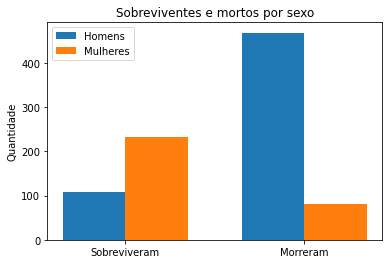

In [9]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, homens, width, label='Homens')
rects2 = ax.bar(x + width/2, mulheres, width, label='Mulheres')

ax.set_ylabel('Quantidade')
ax.set_title('Sobreviventes e mortos por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Esse gráfico mostra que a quantidade de mulheres que sobreviveram foi muito maior que os homens.

In [10]:
#Outra forma de fazer o calculo acima de maneira mais simples e mais automatizada 
#é criar uma função que recebe somente o nome da coluna como parâmetro
def bar_chart(coluna):
    sobreviveram = treino[treino['Survived']==1][coluna].value_counts()
    morreram = treino[treino['Survived']==0][coluna].value_counts()
    df = pd.DataFrame([sobreviveram, morreram])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(6,4))

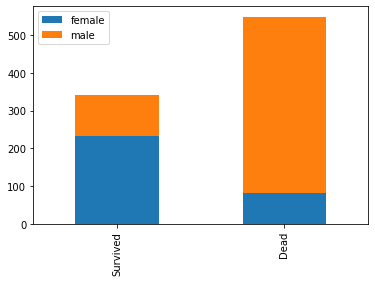

In [11]:
bar_chart('Sex') #O gráfico confirma que mais mulheres sobreviveram do que homens.

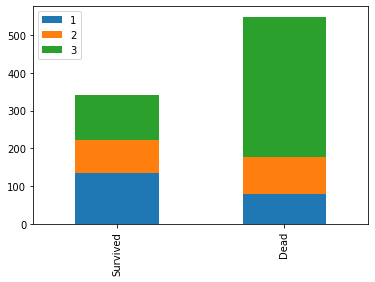

In [12]:
bar_chart('Pclass') 
#É possível notar que proporcionalmente as pessoas da primeira classe sobreviveram mais.
#Seguido da segunda classe e depois da terceira.

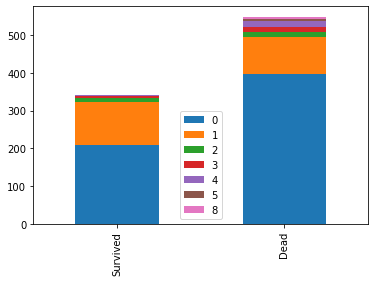

In [13]:
bar_chart('SibSp')
#As pessoas com um irmão ou esposa mais comumente sobreviveram.
#As pessoas com mais do que um irmão, esposa ou sem ninguém mais comumente morreram.

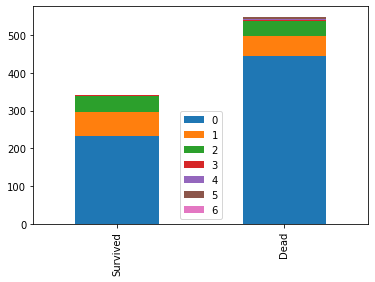

In [14]:
bar_chart('Parch')
#Praticamente metade das pessoas com pais/filhos abordo sobreviveram.
#Enquanto pessoas sem ninguém mais comumente morreram.

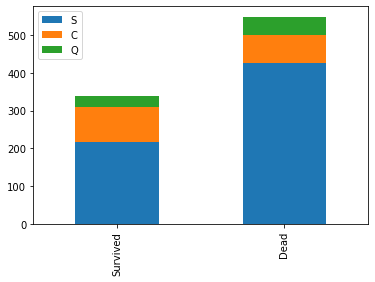

In [15]:
bar_chart('Embarked')

### 4. Tratando dos dados e valores missing

Essa etapa consiste em manipular os dados para que passem de dados strings e numéricos para dados categoricos, bem como aplicar técnicas para tratar dos dados com valores NAN (Missing).

In [16]:
from IPython.display import Image

Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

Com essa imagem é possível observar que as pessoas que ficaram na primeira classe ficaram em posições mais privilegiadas no momento do naufrágio, com isso é possível concluir que Pclass é um atributo muito importante para o classificador.

#### 4.1 Title e Name

In [17]:
treino_teste = [treino, teste] #Uma lista com o Dataframe de treino e teste.

#Para cada dataframe na lista, insira a coluna Título com a string extraída da coluna Name utilizando expressão regular
#Essa expressão regular extrai qualquer string antes de um ponto. 
#Exemplo: "Braund, Mr. Owen Harris" será extraído somente o "Mr." nesse caso.
for df in treino_teste:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [18]:
treino['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [19]:
teste['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Nota-se que a quantidade de Mr, Miss, Mrs e Master estão bem acima das outras categorias, logo, é possível fazer um mapeamento como sendo:
* Mr: 0;
* Miss: 1;
* Mrs: 2;
* Master: 3;
* Others: 4;

In [20]:
title_mapping = {
    'Mr':0,
    'Miss':1,
    'Mrs':2,
    'Master':3,
    'Dr':4, 'Rev':4, 'Major':4, 'Mlle':4, 'Col':4, 'Don':4, 'Sir':4,
    'Countess':4, 'Lady':4, 'Ms':4, 'Capt':4, 'Jonkheer':4, 'Mme':4
}

for df in treino_teste:
    df['Title'] = df['Title'].map(title_mapping)

In [21]:
#Preenchendo os valores que ficaram como nulos.
treino['Title'].fillna(4, inplace=True)
teste['Title'].fillna(4, inplace=True)

In [22]:
#excluindo a coluna name, pois a mesma não se faz mais relevante para o treinamento do modelo.
treino.drop('Name', axis=1, inplace=True)
teste.drop('Name', axis=1, inplace=True)

#### 4.2 Sex
Os valores do atributo Sex são male e female, é mais interessante trabalhar com dados categoricos numéricos, isto é 0 e 1, portanto:
* 0: Male
* 1: Female

In [23]:
teste.Sex.unique()

array(['male', 'female'], dtype=object)

In [24]:
teste.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [25]:
sex_mapping = {
    'male': 0,
    'female': 1
}

for df in treino_teste:
    df['Sex'] = df['Sex'].map(sex_mapping)

#### 4.3 Age

In [26]:
treino['Age'].isnull().sum(), teste['Age'].isnull().sum()

(177, 86)

In [27]:
treino['Age'].fillna(treino.groupby('Title')['Age'].transform('median'), inplace=True)
teste['Age'].fillna(teste.groupby('Title')['Age'].transform('median'), inplace=True)

In [28]:
treino.head(30)
treino.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    44.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

O próximo passo vai ser converter a variável Age de um dado numérico para um dado categórico. Vai ficar:
* Criança: 0,
* Adolescente: 1,
* Jovem: 2
* Adulto: 3,
* Meia idade: 4,
* Idoso: 5

In [29]:
for df in treino_teste:
    df['Age'] = pd.cut(df['Age'], [0, 13, 18, 25, 35, 60,130], labels=[0,1,2,3,4,5])

In [30]:
teste.Age.unique()

[3, 4, 5, 2, 1, 0]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [31]:
teste.Age.value_counts()

3    142
4    105
2    102
0     32
1     26
5     11
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age'>

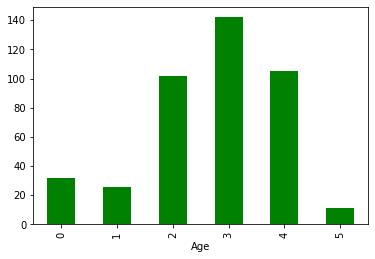

In [32]:
teste.groupby(['Age']).size().plot.bar(color = 'green')

#### 4.4 Embarked
Informação referente ao porto de embarcação. Dá para trabalhar nessa informação.

<AxesSubplot:>

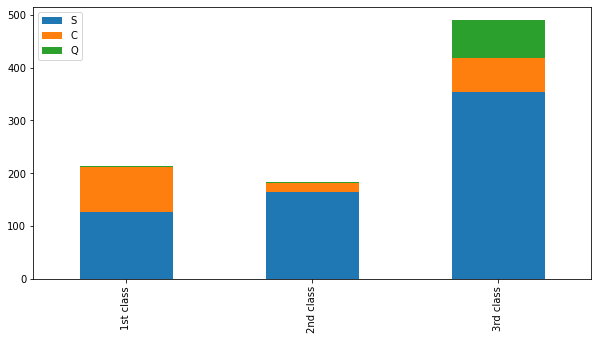

In [33]:
Pclass1 = treino[treino['Pclass']==1]['Embarked'].value_counts()
Pclass2 = treino[treino['Pclass']==2]['Embarked'].value_counts()
Pclass3 = treino[treino['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

* S = Southampton
* C = Cherbourg;
* Q = Queenstown; 
<br> Pelo fato de a maioria das pessoas terem embarcado no porto de Southampton, vamos assumir que os valores nulos nesta coluna também embarcaram em Southampton.

In [34]:
for df in treino_teste:
    df['Embarked'] = df['Embarked'].fillna('S')

In [35]:
#Mapeamento dos dados, transformando valores char em números.
embarked_mapping = {
    'S': 0,
    'C': 1,
    'Q': 2
}

for df in treino_teste:
    df['Embarked'] = df['Embarked'].map(embarked_mapping)

#### 4.5 Fare
Fare é a taxa do ticket, tem alguns valores missing, vamos preencher com a mediana do conjunto.

In [36]:
treino['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
treino['Fare'].fillna(treino.groupby('Pclass')['Fare'].transform('median'), inplace=True)
teste['Fare'].fillna(teste.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [38]:
tempTeste = teste.copy()
tempTreino = treino.copy()
tempTeste.fillna(tempTeste.groupby('Pclass')['Fare'].transform('median'), inplace=True)
tempTreino.fillna(tempTreino.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [39]:
#Transformando a variável Fare em variável categórica
for df in treino_teste:
    df['Fare'] = pd.cut(df['Fare'], [-1, 17, 30, 100, 9999], labels=[0,1,2,3])

#### Cabin

In [40]:
#Vamos pegar somente a primeira letra da frase Cabin
for df in treino_teste:
    df['Cabin'] = df['Cabin'].str[:1]

<AxesSubplot:>

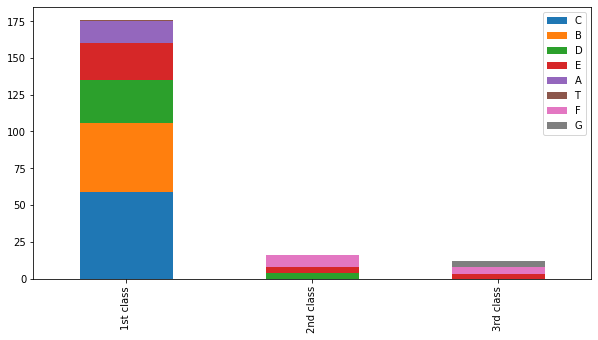

In [41]:
Pclass1 = treino[treino['Pclass']==1]['Cabin'].value_counts()
Pclass2 = treino[treino['Pclass']==2]['Cabin'].value_counts()
Pclass3 = treino[treino['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [42]:
#Fazendo o mapeamento das cabines também.
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for df in treino_teste:
    df['Cabin'] = df['Cabin'].map(cabin_mapping)

In [43]:
#É possível notar que ainda existem muitos valores nulos nesta informação
treino.Cabin.isnull().sum(), teste.Cabin.isnull().sum()

(687, 327)

In [44]:
#Preenchendo os valores nulos do atributo
treino['Cabin'].fillna(treino.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
teste['Cabin'].fillna(teste.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [45]:
treino.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2,1,0,A/5 21171,0,2.0,0,0
1,2,1,1,1,4,1,0,PC 17599,2,0.8,1,2
2,3,1,3,1,3,0,0,STON/O2. 3101282,0,2.0,0,1
3,4,1,1,1,3,1,0,113803,2,0.8,0,2
4,5,0,3,0,3,0,0,373450,0,2.0,0,0


#### 4.6 FamilySize
Os outros atributos que também dá para trabalhar são SibSp e Parch
* SibSp: Número de irmãos e esposa(o)s
* Parch: O Parch é o número de pais e filhos
<br>Como ambos os atriutos se tratam de familiares, é possível juntar em um único atributo.

In [46]:
treino['FamilySize'] = treino['SibSp'] + treino['Parch'] + 1
teste['FamilySize'] = teste['SibSp'] + teste['Parch'] + 1
#Mais um porque se trata do próprio indivíduo.

In [47]:
#A família com maior quantidade de membros a bordo tinha 11 pessoas.
#Para não trabalhar com valores muito grandes, vamos categorizar em valores mais baixos
treino.FamilySize.max(), teste.FamilySize.max()

(11, 11)

In [48]:
family_mapping = {
    1 : 0.0, 2 : 0.3, 3 : 0.6, 4 : 0.9,
    5 : 1.2, 6 : 1.5, 7 : 1.8, 8 : 2.1,
    9 : 2.4, 10: 2.7, 11: 3.0,
}

for df in treino_teste:
    df['FamilySize'] = df['FamilySize'].map(family_mapping)

#### 4.7 Removendo atributos desnecessários
* Ticket: Atributo que não segue nenhuma lógica, portanto é dispensável;
* SibSp e Parch: Esses atributos foram unificados no atributo FamilySize, portanto podem ser excluídos;
* PassengerId: No conjunto de treino essa coluna não se faz necessária.

In [49]:
features_drop = ['Ticket', 'SibSp', 'Parch']
treino = treino.drop(features_drop, axis=1)
teste = teste.drop(features_drop, axis=1)
treino = treino.drop(['PassengerId'], axis=1)

In [50]:
#Vamos separar o conjunto de treinos em atributos e classe.
#Treino_data é o Pandas.DataFrame que vai servir de entrada para o modelo.
#Target é do tipo Pandas.Series que será a variável cujo modelo vai tentar prever o valor.

treino_data = treino.drop('Survived', axis=1)
target = treino['Survived']

type(treino_data), type(target)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### 5. Modelagem

In [51]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

##### 5.1 Utilizando Tensorflow
A minha primeira alternativa é tentar realizar o treinamento utilizando redes neurais profundas. Para isso vou utilizar o Tensorflow 2.x

In [147]:
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [148]:
npTreino = treino_data.to_numpy()
npTarget = target.to_numpy()
# Create a object
encoder = LabelEncoder()
# Apply the fit_transform
target_encoded = encoder.fit_transform(npTarget)
# Apply the One-Hot-Encoding on labels
target_encoded = tf.keras.utils.to_categorical(target_encoded)

In [149]:
# We split the training data into two samples, training and validation
X_train, X_valid, y_train, y_valid = train_test_split(npTreino, npTarget)

#### _Preparing the Data_

In [150]:
# Hyperparameters
batch_size = 32
autotune = tf.data.experimental.AUTOTUNE

#### _Model Building_

In [151]:
#Pre trained model?

In [176]:
model = tf.keras.models.Sequential()

In [177]:
target_encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [178]:
#model.add(tf.keras.Input(shape=(8,)))
model.add(tf.keras.layers.Dense(units=8, activation='relu', input_shape=(8, )))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))        

In [179]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 8)                 72        
                                                                 
 dropout_21 (Dropout)        (None, 8)                 0         
                                                                 
 dense_38 (Dense)            (None, 10)                90        
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 10)               

In [165]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [180]:
# Hyperparameters
batch_size = 32
epochs = 500
lr = 0.01
beta1 = 0.9
beta2 = 0.9
ep = 1e-08

In [181]:
# Model compilation
model.compile(optimizer = Adam(learning_rate = lr, 
                                beta_1 = beta1, 
                                beta_2 = beta2, 
                                epsilon = ep),
               loss = 'sparse_categorical_crossentropy', 
               metrics=['sparse_categorical_accuracy'])

In [182]:
checkpoint1 = tf.keras.callbacks.ModelCheckpoint("best_model.h5", 
                                                verbose = 1, 
                                                save_best_only = True, 
                                                save_weights_only = True)

# Checkpoint
checkpoint2 = tf.keras.callbacks.ModelCheckpoint("last_model.h5", 
                                                verbose = 0, 
                                                save_best_only = False,
                                                save_weights_only = True,
                                                save_freq='epoch')

# Early stop
early_stop = tf.keras.callbacks.EarlyStopping(patience = 50) 

In [183]:
history = model.fit(npTreino, npTarget, 
                    steps_per_epoch = len(npTreino)//batch_size, 
                    epochs = epochs, 
                    callbacks = [checkpoint1, checkpoint2, early_stop]) 

Epoch 1/500
27/27 [==============================] - 1s 8ms/step - loss: 0.6500 - sparse_categorical_accuracy: 0.6207
Epoch 2/500
27/27 [==============================] - 0s 8ms/step - loss: 0.5965 - sparse_categorical_accuracy: 0.6498
Epoch 3/500
27/27 [==============================] - 0s 7ms/step - loss: 0.5609 - sparse_categorical_accuracy: 0.7160
Epoch 4/500
27/27 [==============================] - 0s 8ms/step - loss: 0.5616 - sparse_categorical_accuracy: 0.7093
Epoch 5/500
27/27 [==============================] - 0s 7ms/step - loss: 0.5465 - sparse_categorical_accuracy: 0.7542
Epoch 6/500
27/27 [==============================] - 0s 7ms/step - loss: 0.5312 - sparse_categorical_accuracy: 0.7789
Epoch 7/500
27/27 [==============================] - 0s 7ms/step - loss: 0.5212 - sparse_categorical_accuracy: 0.7677
Epoch 8/500
27/27 [==============================] - 0s 9ms/step - loss: 0.5139 - sparse_categorical_accuracy: 0.7901
Epoch 9/500
27/27 [==============================] - 0s 

In [146]:
#model.fit(npTreino, npTarget, epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.9510 - sparse_categorical_accuracy: 0.6251
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7797 - sparse_categorical_accuracy: 0.6128
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6825 - sparse_categorical_accuracy: 0.6442
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6552 - sparse_categorical_accuracy: 0.6128
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6439 - sparse_categorical_accuracy: 0.6341
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6128 - sparse_categorical_accuracy: 0.6734
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6119 - sparse_categorical_accuracy: 0.6779
Epoch 8/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5886 - sparse_categorical_accuracy: 0.6981
Epoch 9/100
28/28 [==============================] - 0s 

In [184]:
npTeste = teste.to_numpy()
npTreino.shape, npTeste.shape

((891, 8), (418, 9))

In [206]:
npTeste = teste.drop(['PassengerId'], axis=1)
npTeste = npTeste.to_numpy()

In [207]:
previsoes = model.predict(npTeste)
pred = np.argmax(previsoes, axis = 1) 

In [208]:
submission = pd.DataFrame({
        "PassengerId": teste["PassengerId"],
        "Survived": pred
    })

submission.to_csv('submissionTensorflow.csv', index=False)

<p style="color: red; font-weight: bold; font-size:20px">Ainda não trabalhei muito bem com o Tensorflow, vou voltar aqui mais para frente</p>

##### 5.2 Cross Validation (K-Fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

###### 5.2.1 KNN
Tutorial sobre o algoritmo KNN <br>
* Link: https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/ <br>

O algoritmo KNN diferentemente dos outros algoritmos que criam um modelo para a previsão, ele faz a previsão baseado na semelhança com o vizinho mais próximo, ou seja, é em tempo real. Este vizinho mais próximo é dado pela distância euclidiana dos atributos.

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, treino_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# kNN Score
round(np.mean(score)*100, 2)

###### 5.2.2 Decision Tree


É um tipo de algoritmo que cria uma estrutura de árvore até que uma decisão seja feita para um determinado registro. Inicia sempre de um nó raiz, a partir daí selecionando os outros atributos e tomando decisões. 

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, treino_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# decision tree Score
round(np.mean(score)*100, 2)

###### 5.2.3 Random Forest

Modelos compostos por múltiplos modelos mais fracos que são independentemente treinados e a previsão combina esse modelos de alguma forma; Criam vários modelos de árvores diferentes, selecionando diferentes atributos com diferentes configurações. A partir daí o melhor modelo será selecionado através de um processo de votação.

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, treino_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# Random Forest Score
round(np.mean(score)*100, 2)

###### 5.2.4 Naive Bayes

O Naive Bayes é um tipo de classificador que desconsidera a correlação entre os atributos, cada atributo é tratado individualmente.

A resolução de problemas relacionados a texto é muito bem resolvida com a utilização do Naive Bayes. Classificação de textos, filtragem de SPAM e análise de sentimento em redes sociais são algumas das muitas aplicações para o algoritmo.

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, treino_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

###### 5.2.5 SVM

O algoritmo Support Vector Machine traça uma reta e tenta separar linearmente e classificar o conjunto de dados. O algoritmo tenta encontrar a reta que tenha maior distância dentre as classes prevista.

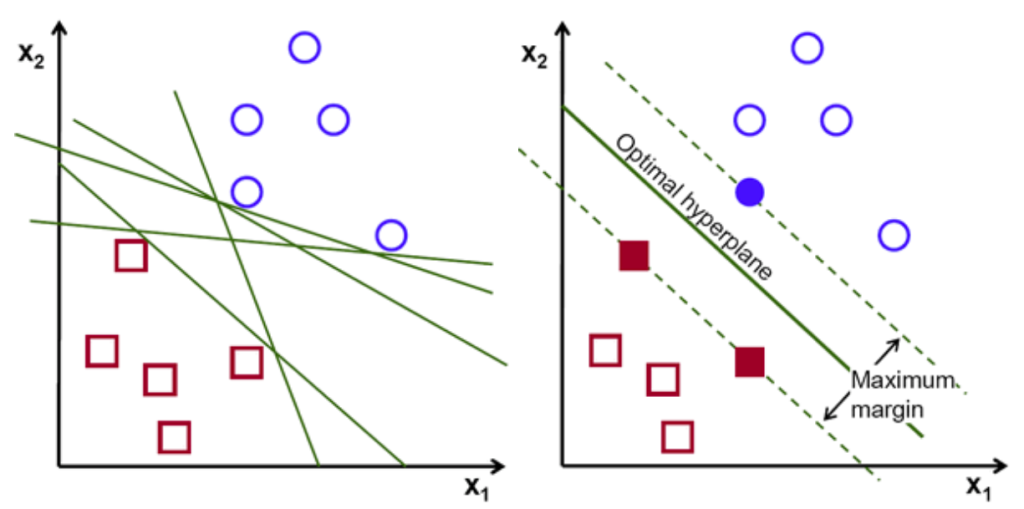

Para aplicar o SVC em conjuntos de dados não linearmente separáveis é necessário configurar o parâmetro Kernel. Este parâmetro é responsável por traçar não somente retas, mas também outros tipos de linhas no conjunto de dados.
>Possibilidades: kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 

In [ ]:
clf = SVC(kernel='poly')
scoring = 'accuracy'
score = cross_val_score(clf, treino_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

### 6. Testando

In [ ]:
clf = SVC(kernel='poly')
clf.fit(treino_data, target)

teste_data = teste.drop("PassengerId", axis=1).copy()
prediction = clf.predict(teste_data)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": teste["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

### 7. Referências

Como citado no começo deste notebook, eu fiz baseado nos seguintes trabalhos:
* https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb
* https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689
* https://olegleyz.github.io/titanic_factors.html
* https://www.codeastar.com/data-wrangling/
* https://www.ahmedbesbes.com/blog/kaggle-titanic-competition